In [1]:
import csv
import pandas as pd
import emoji
import math
import advertools as adv
import numpy as np
from numpy import array
from numpy.linalg import norm
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import regex as re 
import spacy
from gensim.models import Word2Vec
nlp = spacy.load('en_core_web_sm')
import math

In [2]:
em_ebd=pd.read_csv('Emoji_Sentiment_Data_v1.0.csv')


In [3]:
em_ebd.head()

,Emoji,Unicode codepoint,Occurrences,Position,Negative,Neutral,Positive,Unicode name,Unicode block
0,😂,0x1f602,14622,0.805101,3614,4163,6845,FACE WITH TEARS OF JOY,Emoticons
1,❤,0x2764,8050,0.746943,355,1334,6361,HEAVY BLACK HEART,Dingbats
2,♥,0x2665,7144,0.753806,252,1942,4950,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,0x1f60d,6359,0.765292,329,1390,4640,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,0x1f62d,5526,0.803352,2412,1218,1896,LOUDLY CRYING FACE,Emoticons


In [4]:
em_ebd.shape

(969, 9)

In [5]:
em_ebd['sentiment']=['']*969

In [6]:
l=[]
for i,idx in em_ebd.iterrows():
    s=sum([idx['Negative'],idx['Neutral'],idx['Positive']])
    x=idx['Negative']/s
    y=idx['Neutral']/s
    z=idx['Positive']/s
    if x==max(x,y,z):
        l.append(-x)
    elif z==max(x,y,z):
         l.append(z)
    else:
        l.append(0)
#     print(idx['Negative'],idx['Neutral'],idx['Positive'])
#     print(x,y,z)
#     print(idx['senti'])
    
    
    

In [14]:
em_ebd['sentiment']=l

In [7]:
country=[]
dataset='England_tweets_of_interest.csv'
with open(dataset,encoding="utf-8") as file:
    for line in file:
        country.append(line.split('|@|||$|')[2])



In [8]:
country_emoji=[]
#emoji_count=[]
for i in country:
    if len(emoji.emoji_list(i))!=0:
        country_emoji.append(i)
        #emoji_count.append((emoji.emoji_list(i)[0]['emoji']))


emoji_sen=[]
for i in country_emoji:
    em=[]
    for j in emoji.emoji_list(i):
        em.append(j['emoji'])
    emoji_sen.append(em)
emoji_sen_list=[]
for i in emoji_sen:
    s=[]
    for j in i:
        for p in [x for x in emoji.demojize(j).replace(':','').split('_')]:
            s.append(p)
    emoji_sen_list.append(s)

In [15]:
emoji_dict={}
for i,idx in em_ebd.iterrows():
    emoji_dict[idx['Emoji']]=idx['sentiment']
    

In [16]:
l1=[]
for i in emoji_sen:
    s=0
    for j in i:
        if j in emoji_dict.keys():
            s+=emoji_dict[j]
    if s>0:
        l1.append('Positive')
    elif s<0:
        l1.append('Negative')
    else:
        l1.append('Neutral')
    
    
    
    
    
        
    
    

In [17]:
pd.Series(l1).value_counts()

Positive    687094
Neutral     359983
Negative     96654
dtype: int64

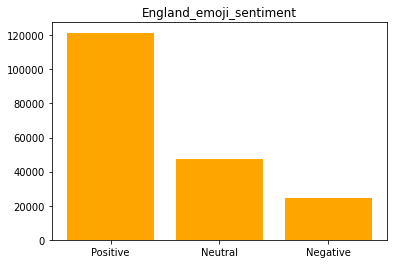

In [22]:
plt.bar(list(pd.Series(l1).value_counts().index),list(pd.Series(l1).value_counts().values),color='orange')
plt.title('England_emoji_sentiment')
plt.savefig('aus_emoji_24.png')

<BarContainer object of 3 artists>

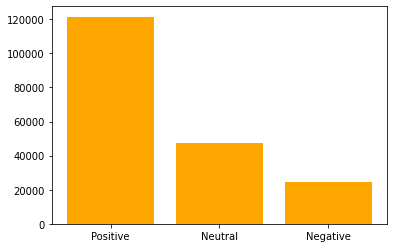

In [19]:
country1=[]
dataset='Nigeria_tweets_of_interest.csv'
with open(dataset,encoding="utf-8") as file:
    for line in file:
        country1.append(line.split('|@|||$|')[2])

country_emoji1=[]
#emoji_count=[]
for i in country1:
    if len(emoji.emoji_list(i))!=0:
        country_emoji1.append(i)
        #emoji_count.append((emoji.emoji_list(i)[0]['emoji']))


emoji_sen1=[]
for i in country_emoji1:
    em=[]
    for j in emoji.emoji_list(i):
        em.append(j['emoji'])
    emoji_sen1.append(em)
emoji_sen_list1=[]
for i in emoji_sen1:
    s=[]
    for j in i:
        for p in [x for x in emoji.demojize(j).replace(':','').split('_')]:
            s.append(p)
    emoji_sen_list1.append(s)

l1=[]
for i in emoji_sen1:
    s=0
    for j in i:
        if j in emoji_dict.keys():
            s+=emoji_dict[j]
    if s>0:
        l1.append('Positive')
    elif s<0:
        l1.append('Negative')
    else:
        l1.append('Neutral')
    
plt.bar(list(pd.Series(l1).value_counts().index),list(pd.Series(l1).value_counts().values),color='orange')   
    
    
    
        
    


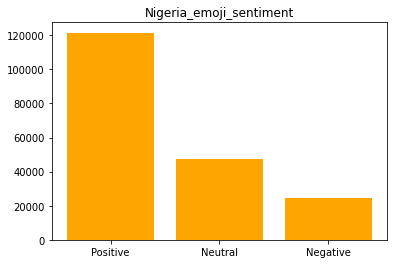

In [23]:
plt.bar(list(pd.Series(l1).value_counts().index),list(pd.Series(l1).value_counts().values),color='orange')
plt.title('Nigeria_emoji_sentiment')
plt.savefig('nig_emoji_24.png')

<BarContainer object of 3 artists>

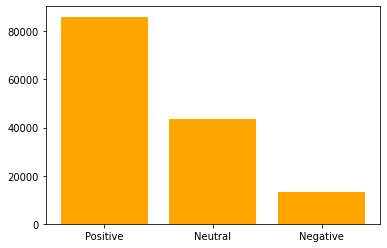

In [20]:
country2=[]
dataset='Australia_tweets_of_interest.csv'
with open(dataset,encoding="utf-8") as file:
    for line in file:
        country2.append(line.split('|@|||$|')[2])

country_emoji2=[]
#emoji_count=[]
for i in country2:
    if len(emoji.emoji_list(i))!=0:
        country_emoji2.append(i)
        #emoji_count.append((emoji.emoji_list(i)[0]['emoji']))


emoji_sen2=[]
for i in country_emoji2:
    em=[]
    for j in emoji.emoji_list(i):
        em.append(j['emoji'])
    emoji_sen2.append(em)
emoji_sen_list2=[]
for i in emoji_sen2:
    s=[]
    for j in i:
        for p in [x for x in emoji.demojize(j).replace(':','').split('_')]:
            s.append(p)
    emoji_sen_list2.append(s)

l11=[]
for i in emoji_sen2:
    s=0
    for j in i:
        if j in emoji_dict.keys():
            s+=emoji_dict[j]
    if s>0:
        l11.append('Positive')
    elif s<0:
        l11.append('Negative')
    else:
        l11.append('Neutral')
    

    
    
    
        
    


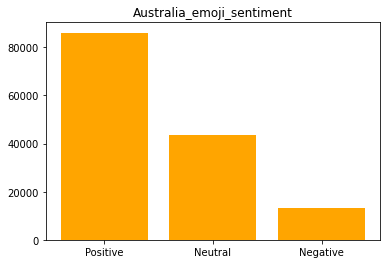

In [24]:
plt.bar(list(pd.Series(l11).value_counts().index),list(pd.Series(l11).value_counts().values),color='orange')   
plt.title('Australia_emoji_sentiment')
plt.savefig('eng_emoji_24.png')